In [43]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import norm
import scipy
from scipy.optimize import curve_fit

%matplotlib inline

In [44]:
df1=pd.read_csv("./14A_10MGy_025.dat",delim_whitespace=True, header=None)
df2=pd.read_csv("./14A_10MGy_100.dat",delim_whitespace=True, header=None)
df3=pd.read_csv("./14A_10MGy_200.dat",delim_whitespace=True, header=None)

In [47]:
df1['anom']=df[3]/df[4]
df2['anom']=df2[3]/df2[4]
df3['anom']=df3[3]/df3[4]

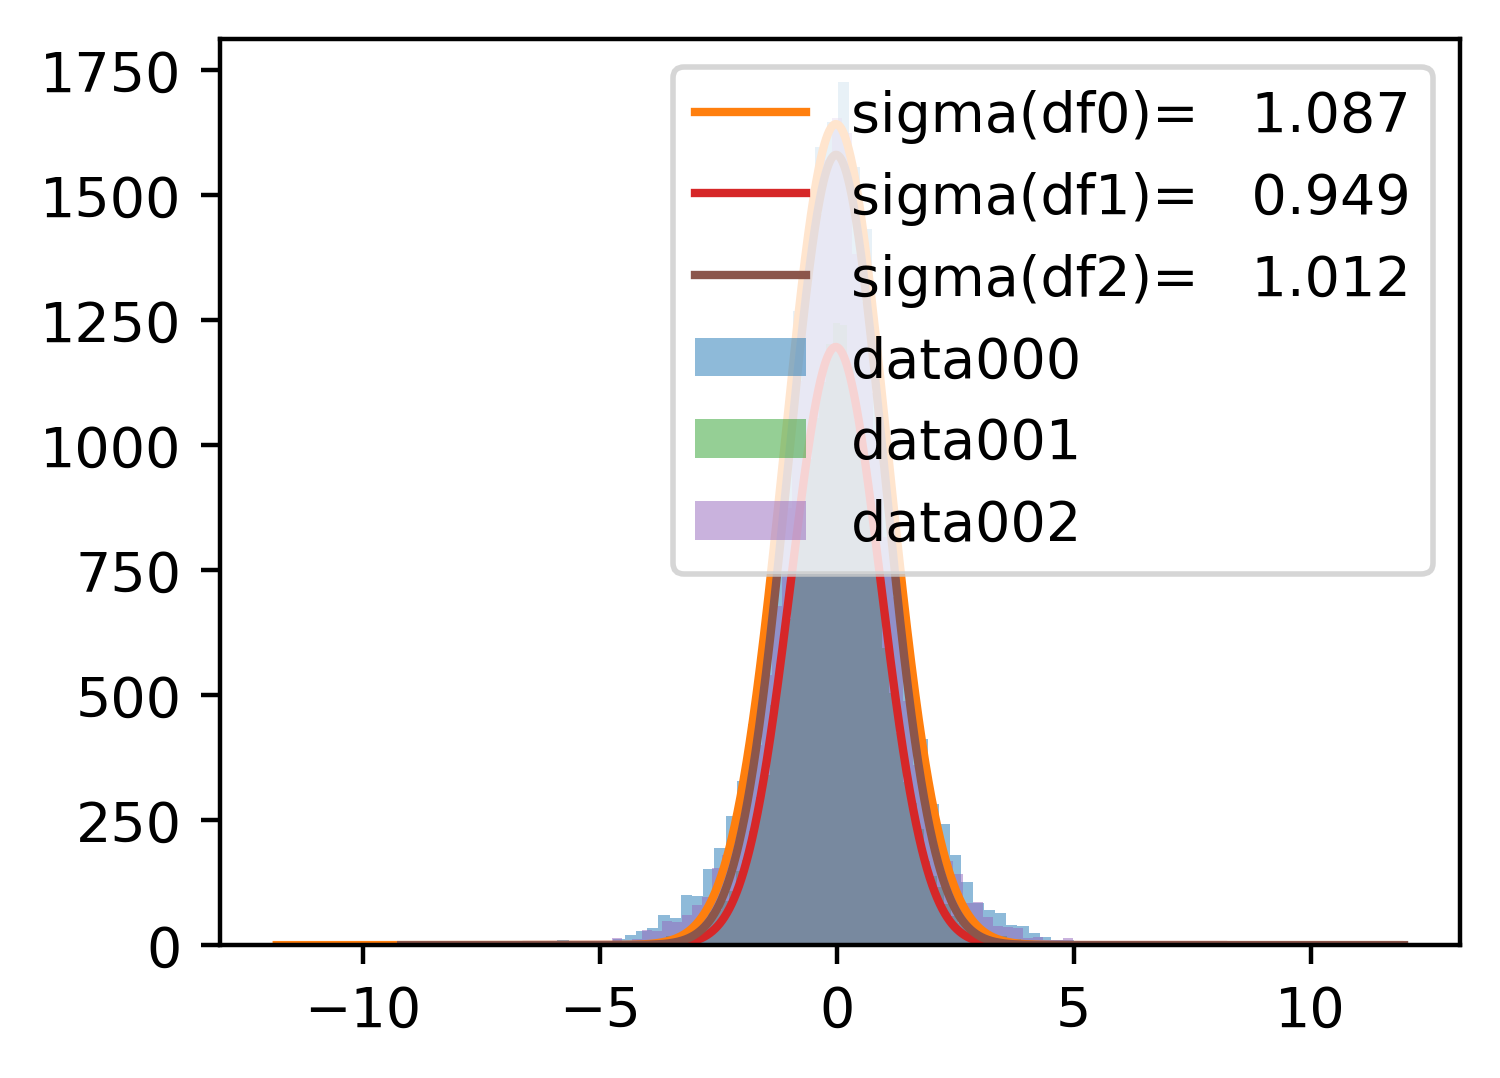

In [56]:
fig = plt.figure(dpi=400,figsize=(4,3))
ax = fig.add_subplot(1,1,1)

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

index=0
for d in [df1, df2, df3]:
    # Bins
    bin_heights, bin_borders, _ = plt.hist(d['anom'], bins=100, alpha=0.5, label="data%03d"%index)
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

    sigma_label="sigma(df%d)=%8.3f" % (index,popt[2])
    x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
    plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label=sigma_label)
    plt.legend()

    index+=1